# Store Sales Time Series Forecasting Dataset (Implementing Various Models and Artifical Neural Networks) for Sales Prediction

## Importing Libraries (Use Colab GPU for faster training)

In [70]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import keras_tuner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
# for running models on gpu
import cupy as cp
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error

In [71]:
# !pip install keras_tuner

## Expolaratory Data Analysis

### Loading Dataset

In [ ]:
file_id = "1lHOFZRtyBLjegcvKhe6i0VwNUbE_2yGO"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_parquet(download_url)

In [ ]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,isHoliday,day_of_week,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1.0,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,1.0,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,1.0,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,1.0,1,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,1.0,1,1,2013


In [ ]:
df.isna().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
isHoliday,0
day_of_week,0
month,0
year,0


,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
isHoliday,0
day_of_week,0
month,0
year,0


In [ ]:
df.shape

(3013362, 10)

In [ ]:
len(df['store_nbr'].unique())

54

In [ ]:
df['family'].value_counts()

,count
family,
AUTOMOTIVE,91314
BABY CARE,91314
BEAUTY,91314
BEVERAGES,91314
BOOKS,91314
BREAD/BAKERY,91314
CELEBRATION,91314
CLEANING,91314
DAIRY,91314


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.corr(numeric_only=True)['isHoliday']

,isHoliday
id,2.696594e-02
store_nbr,-7.664317e-16
sales,8.046486e-03
onpromotion,9.984562e-03
isHoliday,1.000000e+00
day_of_week,-2.153067e-02
month,1.481209e-01
year,-2.876382e-03


In [ ]:
df = df[df['sales']!=0].copy()

In [ ]:
df.shape

(2070879, 10)

In [ ]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'isHoliday', 'day_of_week', 'month', 'year'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,int64
date,object
store_nbr,int64
family,object
sales,float64
onpromotion,int64
isHoliday,float64
day_of_week,int64
month,int64
year,int64


In [ ]:
df.corr(numeric_only=True)['sales']

,sales
id,0.031280
store_nbr,0.061615
sales,1.000000
onpromotion,0.410243
isHoliday,0.010594
day_of_week,0.045537
month,0.012181
year,0.028440


In [ ]:
df.drop(columns=['id'],inplace=True)

In [ ]:
df.head()

,date,store_nbr,family,sales,onpromotion,isHoliday,day_of_week,month,year
563,2013-01-01,25,BEAUTY,2.000,0,1.0,1,1,2013
564,2013-01-01,25,BEVERAGES,810.000,0,1.0,1,1,2013
566,2013-01-01,25,BREAD/BAKERY,180.589,0,1.0,1,1,2013
568,2013-01-01,25,CLEANING,186.000,0,1.0,1,1,2013
569,2013-01-01,25,DAIRY,143.000,0,1.0,1,1,2013


In [ ]:
df.dtypes

,0
date,object
store_nbr,int64
family,object
sales,float64
onpromotion,int64
isHoliday,float64
day_of_week,int64
month,int64
year,int64


In [ ]:
df = pd.get_dummies(df, columns=['day_of_week','month','year'],dtype=int)

In [ ]:
df.head()

,date,store_nbr,family,sales,onpromotion,isHoliday,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,...,month_8,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017
563,2013-01-01,25,BEAUTY,2.000,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
564,2013-01-01,25,BEVERAGES,810.000,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
566,2013-01-01,25,BREAD/BAKERY,180.589,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
568,2013-01-01,25,CLEANING,186.000,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
569,2013-01-01,25,DAIRY,143.000,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df['store_nbr'].unique()

array([25,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 23, 24, 26, 27,
       28,  3, 30, 31, 32, 33, 34, 35, 37, 38, 39,  4, 40, 41, 43, 44, 45,
       46, 47, 48, 49,  5, 50, 51, 54,  6,  7,  8,  9, 36, 53, 20, 29, 21,
       42, 22, 52])

In [ ]:
len(df['family'].unique())

33

In [ ]:
df = pd.get_dummies(df, columns=['store_nbr'],prefix='store',dtype=int)

In [ ]:
df = pd.get_dummies(df, columns=['family'],prefix='family',dtype=int)

In [ ]:
df.head()

,date,sales,onpromotion,isHoliday,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
563,2013-01-01,2.000,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
564,2013-01-01,810.000,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
566,2013-01-01,180.589,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,2013-01-01,186.000,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,2013-01-01,143.000,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns=['date'],inplace=True)

In [ ]:
for i in df.columns:
    print(f"{i} max = {df[str(i)].max()}")
    print(f"{i} min = {df[str(i)].min()}")

sales max = 124717.0
sales min = 0.122
onpromotion max = 741
onpromotion min = 0
isHoliday max = 1.0
isHoliday min = 0.0
day_of_week_0 max = 1
day_of_week_0 min = 0
day_of_week_1 max = 1
day_of_week_1 min = 0
day_of_week_2 max = 1
day_of_week_2 min = 0
day_of_week_3 max = 1
day_of_week_3 min = 0
day_of_week_4 max = 1
day_of_week_4 min = 0
day_of_week_5 max = 1
day_of_week_5 min = 0
day_of_week_6 max = 1
day_of_week_6 min = 0
month_1 max = 1
month_1 min = 0
month_2 max = 1
month_2 min = 0
month_3 max = 1
month_3 min = 0
month_4 max = 1
month_4 min = 0
month_5 max = 1
month_5 min = 0
month_6 max = 1
month_6 min = 0
month_7 max = 1
month_7 min = 0
month_8 max = 1
month_8 min = 0
month_9 max = 1
month_9 min = 0
month_10 max = 1
month_10 min = 0
month_11 max = 1
month_11 min = 0
month_12 max = 1
month_12 min = 0
year_2013 max = 1
year_2013 min = 0
year_2014 max = 1
year_2014 min = 0
year_2015 max = 1
year_2015 min = 0
year_2016 max = 1
year_2016 min = 0
year_2017 max = 1
year_2017 min = 0
s

store_25 max = 1
store_25 min = 0
store_26 max = 1
store_26 min = 0
store_27 max = 1
store_27 min = 0
store_28 max = 1
store_28 min = 0
store_29 max = 1
store_29 min = 0
store_30 max = 1
store_30 min = 0
store_31 max = 1
store_31 min = 0
store_32 max = 1
store_32 min = 0
store_33 max = 1
store_33 min = 0
store_34 max = 1
store_34 min = 0
store_35 max = 1
store_35 min = 0
store_36 max = 1
store_36 min = 0
store_37 max = 1
store_37 min = 0
store_38 max = 1
store_38 min = 0
store_39 max = 1
store_39 min = 0
store_40 max = 1
store_40 min = 0
store_41 max = 1
store_41 min = 0
store_42 max = 1
store_42 min = 0
store_43 max = 1
store_43 min = 0
store_44 max = 1
store_44 min = 0
store_45 max = 1
store_45 min = 0
store_46 max = 1
store_46 min = 0
store_47 max = 1
store_47 min = 0
store_48 max = 1
store_48 min = 0
store_49 max = 1
store_49 min = 0
store_50 max = 1
store_50 min = 0
store_51 max = 1
store_51 min = 0
store_52 max = 1
store_52 min = 0
store_53 max = 1
store_53 min = 0
store_54 max =

In [ ]:
df['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

In [ ]:
df.drop(columns=['onpromotion'],inplace=True)

In [ ]:
# scaler = StandardScaler()
# df['onpromotion'] = scaler.fit_transform(df[['onpromotion']])

In [ ]:
df.head()

,sales,isHoliday,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,month_1,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
563,2.000,1.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
564,810.000,1.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
566,180.589,1.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
568,186.000,1.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
569,143.000,1.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df['onpromotion'].max()

In [ ]:
# df['onpromotion'].min()

In [ ]:
df['sales'].max()

124717.0

In [ ]:
df['sales'].min()

0.122

In [ ]:
df['sales'].mean()

np.float64(521.1621470152788)

In [ ]:
df.columns

Index(['sales', 'isHoliday', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'month_1',
       ...
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD'],
      dtype='object', length=113)

### Splitting data in train test

In [ ]:
X = df.drop(columns=['sales'])
y = df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1656703, 112), (414176, 112), (1656703,), (414176,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1325362, 112), (331341, 112), (1325362,), (331341,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1060289, 112), (265073, 112), (1060289,), (265073,))

## Model Building, Training and Evaluation

### ML Models - Linear Regression, Random Forest, XGBoost

In [ ]:
models = {
    'LinearRegression':LinearRegression(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor()
}


In [ ]:
mae_train = {}
mae_test = {}

In [ ]:
models['LinearRegression'].fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_train = models['LinearRegression'].predict(X_train)

In [ ]:
mean_absolute_error(y_train,y_pred_train)

366.02609404351955

In [ ]:
y_pred_test = models['LinearRegression'].predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred_test)

366.86209973500604

In [ ]:
mae_train['LinearRegression'] = mean_absolute_error(y_train,y_pred_train)
mae_test['LinearRegression'] = mean_absolute_error(y_test,y_pred_test)

In [ ]:
models['XGBRegressor'] = XGBRegressor()

In [ ]:
models['XGBRegressor'].fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_test = models['XGBRegressor'].predict(X_test)
y_pred_train = models['XGBRegressor'].predict(X_train)
mae_train['XGBRegressor'] = mean_absolute_error(y_train,y_pred_train)
mae_test['XGBRegressor'] = mean_absolute_error(y_test,y_pred_test)

In [ ]:
mae_train

{'LinearRegression': 366.02609404351955, 'XGBRegressor': 143.06729318976235}

In [ ]:
mae_test

{'LinearRegression': 366.86209973500604, 'XGBRegressor': 145.3291403188377}

In [ ]:
model = RandomForestRegressor(
    n_estimators=25, 
    max_depth=15,        # Prevents trees from becoming infinitely deep
    max_samples=0.5,     # Trains each tree on only 150k rows instead of all 300k
    n_jobs=-1            # Uses all available Colab CPU cores
)
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae_train['RandomForestRegressor'] = mean_absolute_error(y_train,y_pred_train)
mae_test['RandomForestRegressor'] = mean_absolute_error(y_test,y_pred_test)

In [ ]:
# Convert your result dictionaries to a DataFrame
results = pd.DataFrame({
    'Model': list(mae_test.keys()),
    'Train MAE': list(mae_train.values()),
    'Test MAE': list(mae_test.values())
})

# Melt the data for Seaborn (converts it from wide to long format)
results_melted = results.melt(id_vars='Model', var_name='Dataset', value_name='MAE')

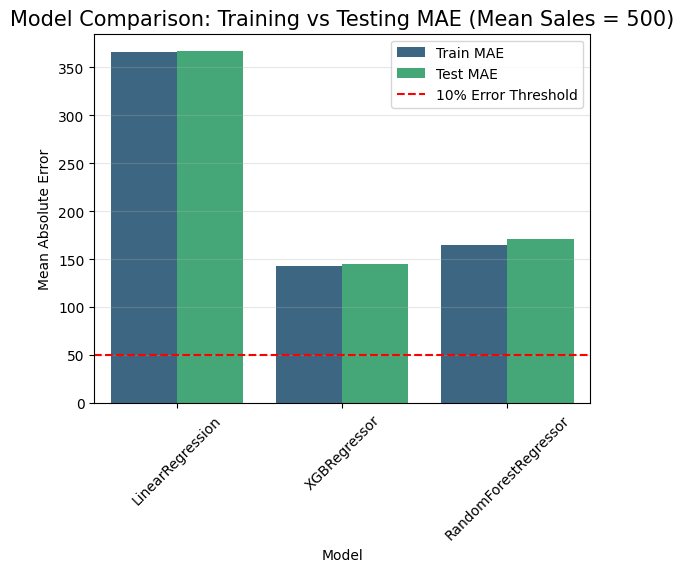

In [ ]:

sns.barplot(data=results_melted, x='Model', y='MAE', hue='Dataset', palette='viridis')

# Add a reference line for your mean (500)
plt.axhline(500 * 0.1, color='red', linestyle='--', label='10% Error Threshold')

plt.title('Model Comparison: Training vs Testing MAE (Mean Sales = 500)', fontsize=15)
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
mae_train

{'LinearRegression': 366.02609404351955,
 'XGBRegressor': 143.06729318976235,
 'RandomForestRegressor': 165.39160658613324}

In [ ]:
mae_test

{'LinearRegression': 366.86209973500604,
 'XGBRegressor': 145.3291403188377,
 'RandomForestRegressor': 171.40186929841062}

### DeepLearning Model - Artificial Neural Network

In [ ]:
X_train.shape

(1060289, 113)

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(113,)),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(1,activation='linear'),
    ]
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        14,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,961 (97.50 KB)

 Trainable params: 24,961 (97.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss=keras.losses.MeanAbsoluteError(),
    optimizer=keras.optimizers.Adam()
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test,y_test),
    epochs=5,
    batch_size=512,
)

Epoch 1/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 261.2304 - val_loss: 104.1579
Epoch 2/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 97.4150 - val_loss: 86.2114
Epoch 3/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 83.7642 - val_loss: 80.1986
Epoch 4/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 78.6217 - val_loss: 78.1294
Epoch 5/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 76.1237 - val_loss: 77.0734


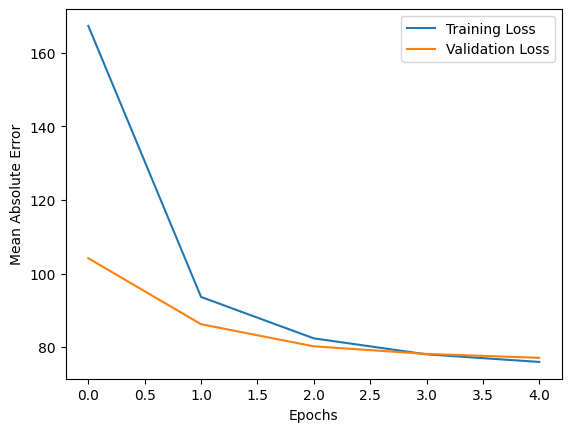

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [ ]:
# 1. Predict
y_pred = model.predict(X_test)

# 2. Evaluate (This returns the loss and any metrics you defined)
results = model.evaluate(X_test, y_test)
print(f"Final Test MAE: {results}")

8284/8284 ━━━━━━━━━━━━━━━━━━━━ 6s 713us/step
8284/8284 ━━━━━━━━━━━━━━━━━━━━ 8s 961us/step - loss: 76.5389
Final Test MAE: 77.0733642578125


In [ ]:
mean_absolute_error(y_test,y_pred)

77.07339526075536

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mae_train['ANN'] = mean_absolute_error(y_train,y_pred_train)
mae_test['ANN'] = mean_absolute_error(y_test,y_pred_test)

33135/33135 ━━━━━━━━━━━━━━━━━━━━ 25s 747us/step
8284/8284 ━━━━━━━━━━━━━━━━━━━━ 6s 749us/step


In [ ]:
mae_train

{'LinearRegression': 366.02609404351955,
 'XGBRegressor': 143.06729318976235,
 'RandomForestRegressor': 165.39160658613324,
 'ANN': 75.09598745115171}

In [ ]:
mae_test

{'LinearRegression': 366.86209973500604,
 'XGBRegressor': 145.3291403188377,
 'RandomForestRegressor': 171.40186929841062,
 'ANN': 77.07339526075536}

In [ ]:
mae_df = pd.DataFrame({
    'Model': list(mae_test.keys()),
    'Test MAE': list(mae_test.values()),
    'Train MAE': list(mae_train.values())
})

In [ ]:
results_melted = mae_df.melt(id_vars='Model', var_name='Dataset', value_name='MAE')

In [ ]:
results_melted

,Model,Dataset,MAE
0,LinearRegression,Test MAE,366.862100
1,XGBRegressor,Test MAE,145.329140
2,RandomForestRegressor,Test MAE,171.401869
3,ANN,Test MAE,77.073395
4,LinearRegression,Train MAE,366.026094
5,XGBRegressor,Train MAE,143.067293
6,RandomForestRegressor,Train MAE,165.391607
7,ANN,Train MAE,75.095987


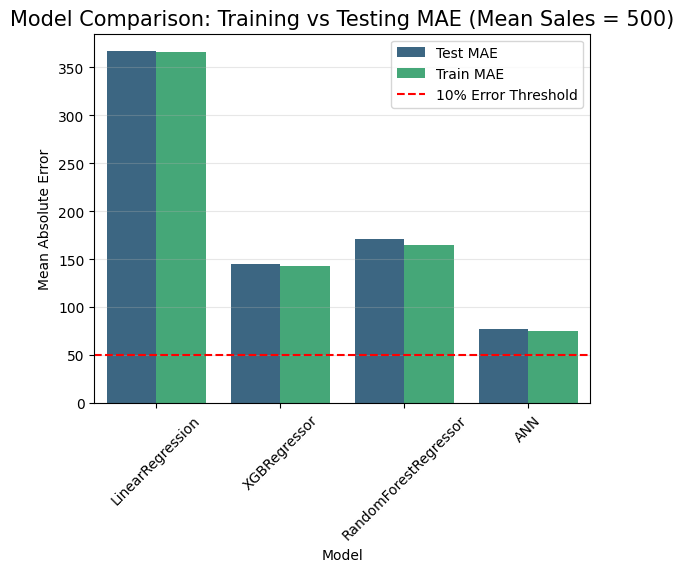

In [ ]:
sns.barplot(data=results_melted, x='Model', y='MAE', hue='Dataset', palette='viridis')
plt.axhline(500 * 0.1, color='red', linestyle='--', label='10% Error Threshold')
plt.title('Model Comparison: Training vs Testing MAE (Mean Sales = 500)', fontsize=15)
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

## Hyperparameters Tuning

### ML Models with RandomSearchCV

In [ ]:
mae_train_best = {}
mae_test_best = {}

##### XGB Regressor

In [ ]:
model_xgb = XGBRegressor(tree_method='hist', device='cuda')
param_distributions = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 9,11,13,15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5, 6, 8, 10]
}

In [ ]:
xgb_random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Transfer data from CPU (NumPy/Pandas) to GPU (CuPy)
X_gpu_small = cp.array(X_train[:100])
y_gpu_small = cp.array(y_train[:100])

In [ ]:
xgb_random_search.fit(X_gpu_small,y_gpu_small)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cuda',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constrai...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5, 6, 8, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.4],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
xgb_random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 500,
 'max_depth': 11,
 'learning_rate': 0.05,
 'gamma': 5,
 'colsample_bytree': 0.6}

In [ ]:
# Transfer data from CPU (NumPy/Pandas) to GPU (CuPy)
X_gpu = cp.array(X_train)
y_gpu = cp.array(y_train)


In [ ]:
xgb_best_random_search = XGBRegressor(tree_method='hist', device='cuda',
subsample=1.0,n_estimators=1000,max_depth=9,learning_rate=0.3,gamma=5,colsample_bytree=0.8)

In [ ]:
# xgb_best_random_search = XGBRegressor(tree_method='hist', device='cuda',
# subsample=1.0,n_estimators=500,max_depth=5,learning_rate=0.001,gamma=10,colsample_bytree=0.8, reg_lambda=10)

In [ ]:
xgb_best_random_search.fit(X_gpu,y_gpu)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_train = xgb_best_random_search.predict(X_train)
y_pred_test = xgb_best_random_search.predict(X_test)
print(mean_absolute_error(y_train,y_pred_train))
print(mean_absolute_error(y_test,y_pred_test))

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [18:32:26] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


60.3876488525199
82.58915344342937


In [ ]:
mae_train_best['XGBRegressor'] = mean_absolute_error(y_train,y_pred_train)
mae_test_best['XGBRegressor'] = mean_absolute_error(y_test,y_pred_test)

In [ ]:
mae_train_best

{'XGBRegressor': 60.3876488525199}

In [ ]:
mae_test_best

{'XGBRegressor': 82.58915344342937}

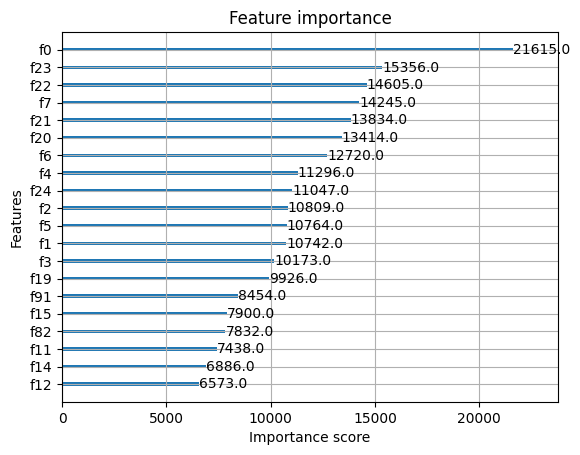

In [ ]:
# Plot the top 20 most important features
plot_importance(xgb_best_random_search, max_num_features=20)
plt.show()

In [ ]:
X_train.columns

Index(['isHoliday', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'month_1', 'month_2',
       ...
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD'],
      dtype='object', length=112)

#### Random Forest Regressor

In [ ]:
# for speed training with gpu
from cuml.ensemble import RandomForestRegressor
import cupy as cp

In [ ]:


# 1. Convert data to GPU memory (CuPy)
X_gpu = cp.array(X_train[:100].values, dtype=cp.float32)
y_gpu = cp.array(y_train[:100].values, dtype=cp.float32)

In [ ]:
# Define parameter distributions for common hyperparameters
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the base model
rf = RandomForestRegressor()
# Initialize and configure RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, 
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rf_random.fit(X_gpu,y_gpu)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/cuml/internals/api_d

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
print(rf_random.best_params_)

{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 80, 'bootstrap': False}


In [ ]:
# {'n_estimators': 138, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 80, 'bootstrap': False}

In [ ]:
X_gpu = cp.array(X_train.values, dtype=cp.float32)
y_gpu = cp.array(y_train.values, dtype=cp.float32)

In [ ]:
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 80, 'bootstrap': False}

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 80,
 'bootstrap': False}

In [ ]:
random_forest_best_random_search = RandomForestRegressor(
    n_estimators=10,n_streams=8, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=True
)

In [ ]:
random_forest_best_random_search.fit(X_gpu,y_gpu)

RandomForestRegressor()

In [ ]:
y_pred_train = random_forest_best_random_search.predict(X_train)
y_pred_test = random_forest_best_random_search.predict(X_test)
print(mean_absolute_error(y_train,y_pred_train))
print(mean_absolute_error(y_test,y_pred_test))

195.8068820718381
197.96661551653466


In [ ]:
mae_train_best['RandomForestRegressor'] = mean_absolute_error(y_train,y_pred_train)
mae_test_best['RandomForestRegressor'] = mean_absolute_error(y_test,y_pred_test)

In [ ]:
mae_train_best

{'XGBRegressor': 60.3876488525199, 'RandomForestRegressor': 195.8068820718381}

In [ ]:
mae_test_best

{'XGBRegressor': 82.58915344342937,
 'RandomForestRegressor': 197.96661551653466}

In [ ]:
mae_df = pd.DataFrame({
    'Model': list(mae_test_best.keys()),
    'Test MAE': list(mae_test_best.values()),
    'Train MAE': list(mae_train_best.values())
})

In [ ]:
# Melt the data for Seaborn (converts it from wide to long format)
results_melted = mae_df.melt(id_vars='Model', var_name='Dataset', value_name='MAE')

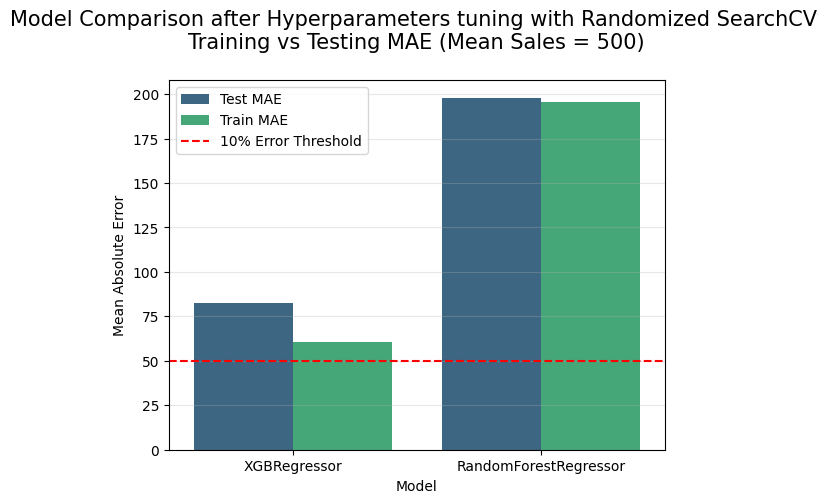

In [ ]:

sns.barplot(data=results_melted, x='Model', y='MAE', hue='Dataset', palette='viridis')

# Add a reference line for your mean (500)
plt.axhline(500 * 0.1, color='red', linestyle='--', label='10% Error Threshold')

plt.title('Model Comparison after Hyperparameters tuning with Randomized SearchCV \nTraining vs Testing MAE (Mean Sales = 500)\n', fontsize=15)
plt.ylabel('Mean Absolute Error')
# plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

### Neural Networks using Keras Tuner Random Search

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    
    # Tuning 3 layers independently
    model.add(keras.layers.Dense(hp.Choice('units_1', [32, 64, 128, 256]), activation='relu'))
    model.add(keras.layers.Dense(hp.Choice('units_2', [32, 64, 128, 256]), activation='relu'))
    model.add(keras.layers.Dense(hp.Choice('units_3', [32, 64, 128, 256]), activation='relu'))
    
    model.add(keras.layers.Dense(units=1, activation='linear'))

    # Step 1: Pick the optimizer name
    opt_choice = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    
    # Step 2: Pick a learning rate (Log scale is best for LR)
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    # Step 3: Map name to actual Keras Optimizer object
    if opt_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif opt_choice == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=lr)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)

    model.compile(loss='mae', optimizer=optimizer)
    return model

In [ ]:
def build_model(hp):
    model = keras.Sequential()

    activation_choice = hp.Choice('activation', values=['relu', 'tanh', 'selu', 'elu'])

    for i in range(1,10):
        model.add(keras.layers.Dense(
            hp.Choice(f'units_{i}', [32, 64, 128, 256, 512]),
            activation=activation_choice
        ))

    model.add(keras.layers.Dense(1, activation='linear'))

    model.compile(loss='mae', optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']))
    
    return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model, objective='val_loss', max_trials=10, overwrite=True,
    project_name='new_project_7'
)

In [ ]:
tuner.search(
    X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test,y_test)
)

Trial 10 Complete [00h 01m 26s]
val_loss: 71.791015625

Best val_loss So Far: 70.53133392333984
Total elapsed time: 00h 14m 50s


In [ ]:
tuner.results_summary()

Results summary
Results in ./new_project_7
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 00 summary
Hyperparameters:
activation: relu
units_1: 512
units_2: 32
units_3: 32
units_4: 512
units_5: 32
units_6: 32
units_7: 256
units_8: 128
units_9: 64
optimizer: adam
Score: 70.53133392333984

Trial 09 summary
Hyperparameters:
activation: relu
units_1: 512
units_2: 32
units_3: 256
units_4: 512
units_5: 128
units_6: 128
units_7: 64
units_8: 128
units_9: 256
optimizer: rmsprop
Score: 71.791015625

Trial 03 summary
Hyperparameters:
activation: relu
units_1: 128
units_2: 128
units_3: 512
units_4: 64
units_5: 64
units_6: 512
units_7: 512
units_8: 64
units_9: 64
optimizer: adam
Score: 74.35453796386719

Trial 06 summary
Hyperparameters:
activation: relu
units_1: 128
units_2: 64
units_3: 128
units_4: 32
units_5: 128
units_6: 256
units_7: 256
units_8: 128
units_9: 256
optimizer: rmsprop
Score: 76.60092163085938

Trial 04 summary
Hyperparameters:
activation: elu
units_1: 12

In [ ]:
# 1. Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# 2. Build the model with those parameters
model = tuner.hypermodel.build(best_hps)

# 3. Retrain to get the history object
history = model.fit(
    X_train, y_train, 
    epochs=10, batch_size=512,
    validation_data=(X_test, y_test)
)


Epoch 1/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 170.0187 - val_loss: 86.8771
Epoch 2/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 80.1235 - val_loss: 76.6549
Epoch 3/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 75.8895 - val_loss: 75.0106
Epoch 4/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 73.5885 - val_loss: 74.6032
Epoch 5/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 72.3071 - val_loss: 76.0212
Epoch 6/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 71.6892 - val_loss: 73.7345
Epoch 7/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 70.5324 - val_loss: 71.5910
Epoch 8/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 69.1866 - val_loss: 71.8591
Epoch 9/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 69.1753 - val_loss: 70.6453
Epoch 10/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 68.0775 - val_loss: 70.7801


In [74]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │        57,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,085 (1.82 MB)

 Trainable params: 159,361 (622.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 318,724 (1.22 MB)

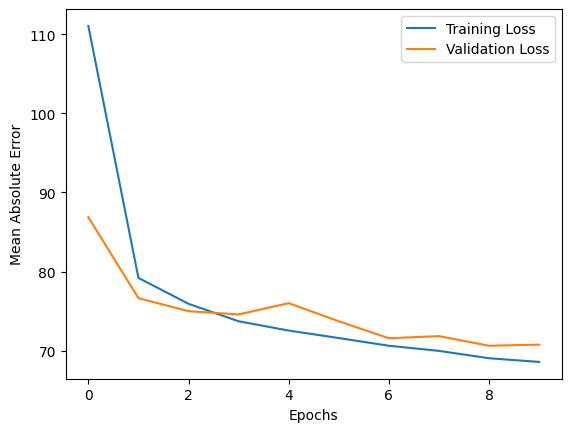

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [ ]:
# 1. Predict
y_pred = model.predict(X_test)
# 2. Evaluate (This returns the loss and any metrics you defined)
results = model.evaluate(X_test, y_test)
print(f"Final Test MAE: {results}")

8284/8284 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
8284/8284 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 69.9167
Final Test MAE: 70.78009796142578


In [ ]:
mean_absolute_error(y_test,y_pred)

70.78008133825084

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mae_train_best['ANN'] = mean_absolute_error(y_train,y_pred_train)
mae_test_best['ANN'] = mean_absolute_error(y_test,y_pred_test)


33135/33135 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step
8284/8284 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


In [ ]:
mae_train_best

{'ANN': 66.52132324198183}

In [ ]:
mae_test_best

{'ANN': 70.78008133825084}

In [ ]:
mae_best_df = pd.DataFrame({
    'Model': list(mae_test_best.keys()),
    'Test MAE': list(mae_test_best.values()),
    'Train MAE': list(mae_train_best.values())
})

In [ ]:
results_melted_best = mae_best_df.melt(id_vars='Model', var_name='Dataset', value_name='MAE')

In [ ]:
results_melted_best

,Model,Dataset,MAE
0,ANN,Test MAE,70.780081
1,ANN,Train MAE,66.521323


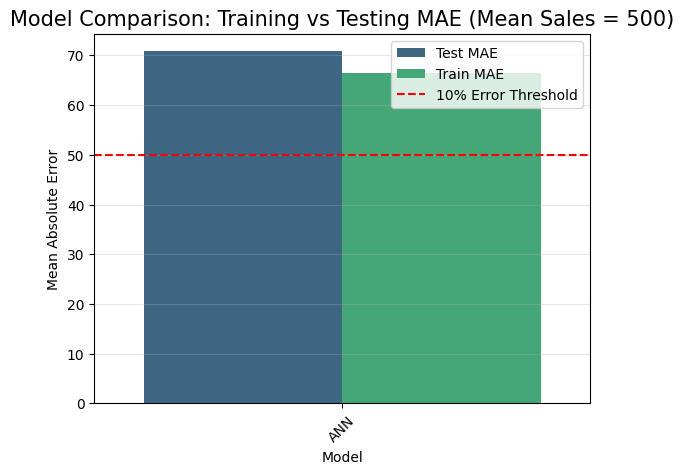

In [ ]:
sns.barplot(data=results_melted_best, x='Model', y='MAE', hue='Dataset', palette='viridis')
plt.axhline(500 * 0.1, color='red', linestyle='--', label='10% Error Threshold')
plt.title('Model Comparison: Training vs Testing MAE (Mean Sales = 500)', fontsize=15)
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
# model = keras.Sequential(
#     [
#         keras.layers.Input(shape=(113,)),
#         keras.layers.Dense(128,activation='relu'),
#         keras.layers.Dense(64,activation='relu'),
#         keras.layers.Dense(32,activation='relu'),
#         keras.layers.Dense(1,activation='linear'),
#     ]
# )
# model.compile(
#     loss=keras.losses.MeanAbsoluteError(),
#     optimizer=keras.optimizers.Adam()
# )
# history = model.fit(
#     X_train,
#     y_train,
#     validation_data=(X_test,y_test),
#     epochs=5,
#     batch_size=512,
# )